# Human Machine Interaction and Bias Mitigation
### Predicting Diabetes Insipidus using dedicated Biomarkers

Diabetes insipidus (DI) is a rare condition characterized by an imbalance in water regulation, leading to excessive urination and intense thirst. Unlike diabetes mellitus, DI is not related to blood sugar levels but rather to a deficiency in the hormone vasopressin (antidiuretic hormone, ADH) or the kidneys' response to it. There are two primary types of DI: central and nephrogenic. 

- **Central diabetes insipidus**
    - occurs due to insufficient production or release of ADH from the hypothalamus or pituitary gland, often resulting from injury, surgery, or genetic factors. 
- **Nephrogenic diabetes insipidus**
    - on the other hand, arises when the kidneys fail to respond adequately to ADH, which can be caused by genetic mutations, certain medications, or chronic kidney disorders. 
    
Understanding these variations is crucial for accurate diagnosis and effective treatment, as the underlying causes and management strategies differ significantly between the two types.

In [213]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [214]:
# Load the data file
file_path = '../data/biomarker_dataset.csv'
df = pd.read_csv(file_path, delimiter=',')

# Exploratory data analysis

In [215]:
# Display the first few rows of the dataframe
df

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
0,0.088850,-0.558571,-0.044022,-0.205063,-0.058439,0,0
1,0.345594,0.343953,-0.530874,0.442238,0.234942,51,1
2,0.790099,1.038287,-0.790693,0.817564,1.871504,0,1
3,0.905293,1.254929,-0.947177,0.522782,2.929458,8,1
4,0.279895,-0.324696,-0.625348,0.929489,0.370501,0,0
...,...,...,...,...,...,...,...
997,-0.018518,-0.589220,0.158954,-0.334438,0.084316,0,0
998,0.385349,0.959013,-0.375285,0.517539,1.547227,34,1
999,-0.346210,-0.489407,0.290889,-0.152735,0.636084,0,0
1000,999.000000,0.959013,-0.375285,0.517539,1.547227,34,1


In [216]:
# check the dimensions of the data with df.shape attribute.
df.shape

(1002, 7)

We can view the top five and bottom five rows of the dataset with df.head() and df.tail() methods respectively.

In [217]:
df.head()

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
0,0.088850,-0.558571,-0.044022,-0.205063,-0.058439,0,0
1,0.345594,0.343953,-0.530874,0.442238,0.234942,51,1
2,0.790099,1.038287,-0.790693,0.817564,1.871504,0,1
3,0.905293,1.254929,-0.947177,0.522782,2.929458,8,1
4,0.279895,-0.324696,-0.625348,0.929489,0.370501,0,0


In [218]:
df.tail()

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
997,-0.018518,-0.589220,0.158954,-0.334438,0.084316,0,0
998,0.385349,0.959013,-0.375285,0.517539,1.547227,34,1
999,-0.346210,-0.489407,0.290889,-0.152735,0.636084,0,0
1000,999.000000,0.959013,-0.375285,0.517539,1.547227,34,1
1001,999.000000,-0.489407,0.290889,-0.152735,0.636084,0,0


**Number of unique values in column**

In [219]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Urine osmolality: 902
Number of distinct types in Sodium: 1000
Number of distinct types in Copeptin test: 1000
Number of distinct types in Glucose: 1000
Number of distinct types in Feature eng. of sodium and copeptin: 1000
Number of distinct types in Time between first symptoms and diagnosis (in days): 101
Number of distinct types in Outcome: 2


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Urine osmolality                                     1002 non-null   float64
 1   Sodium                                               1002 non-null   float64
 2   Copeptin test                                        1002 non-null   float64
 3   Glucose                                              1002 non-null   float64
 4   Feature eng. of sodium and copeptin                  1002 non-null   float64
 5   Time between first symptoms and diagnosis (in days)  1002 non-null   int64  
 6   Outcome                                              1002 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.9 KB


### Handling invalid values

view the summary statistics of numerical columns with df.describe() method. It enable us to detect outliers in the data which require further investigation.



In [221]:
df.describe()

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,2.338916,0.421714,-0.359598,0.147107,1.099668,24.482036,0.497006
std,44.597606,0.656990,0.622017,0.504924,1.173573,31.958392,0.500241
min,-1.424271,-1.185126,-2.056621,-1.637505,-1.136456,0.000000,0.000000
25%,-0.011932,-0.093278,-0.820880,-0.171309,0.242512,0.000000,0.000000
50%,0.345594,0.440867,-0.360559,0.134889,0.880090,0.000000,0.000000
75%,0.703248,0.899744,0.055694,0.489430,1.733200,51.000000,1.000000
max,999.000000,2.232990,1.322518,1.597155,5.717749,100.000000,1.000000


## Evaluation of biomarkers

Discuss its significance and usability for diagnosis. 
Highlight the relevance of each biomarker in the context of the disease or condition being diagnosed.

**ChatGPT Prompt**: Please highlight the significance and usability or this features for Diabetes Insipidus in markdown Tabular form and plase add a column that shows the relevance of each feature in the context of diabetes insipidus.

## Interpretation

**Feature:**
- Urine osmolality
    - 'Urine osmolality' seems to have significant outliers which may have big impact later in the training of the model and prediction.
    - It shows that 100 samples of the values have been mean imputed: 0.345594
- If the feature 'Feature eng. of sodium squared and copeptin squared' in the prediction has a high impact on the models performance to be researched later, we might have a bias here and need to do research if the formula is actually used in real life & think of being a problem when negative values of the features 'Sodium' & 'Copeptin' are squared.
- The feature 'Time between first symptoms and diagnosis (in days)' seems to be a big issue if the value is 0, we have to take care of this problem, either drop the column completely or impute the values.

**General observation**

We can see that there are a lot of negative values in the dataset for the columns: 'Urine osmolalilty', 'Sodium', 'Copeptin test', 'Glucose', 'Feature eng. of sodium and copeptin', which might be an indication that the measurement or data collection / processing had flaws. 
This will be inspected closely later on.

Futher no missing data was found or invalid values in the dataset.

SideNote: It is remarkable that the balance of the Outcom (target) is almost completely balanced.


## Summary

The following table highlights the significance and description of features in the given dataset. The Rows are sorted based on the expected significance.

| Feature                                   | Significance                                                                                          | Usability                                                           | Relevance in the Context of Diabetes Insipidus                         |
|-------------------------------------------|------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------|------------------------------------------------------------------------|
| Diagnosis (0: No Diabetes Insipidus, 1: Diabetes Insipidus) | Indicates the presence or absence of diabetes insipidus                                               | Dependent variable for diagnostic and predictive models              | High - Essential for building and validating diagnostic models         |
| Urine osmolality                          | Indicates the concentration of urine, which is often low in diabetes insipidus due to diluted urine   | Used to differentiate between central and nephrogenic diabetes insipidus | High - Key diagnostic feature as patients typically have low urine osmolality |
| Sodium                                    | Measures blood sodium levels, which can be elevated in diabetes insipidus                             | Helps identify hypernatremia, a common condition in diabetes insipidus | High - Hypernatremia is often associated with diabetes insipidus       |
| Copeptin test                             | Measures copeptin levels, a surrogate marker for vasopressin secretion                                | Helps distinguish between central and nephrogenic diabetes insipidus | High - Low copeptin levels indicate central diabetes insipidus        |
| Feature eng. of sodium squared and copeptin squared | Captures non-linear relationships that might improve predictive modeling                              | Enhances the accuracy of predictive models                           | Medium - May provide additional insights when combined with other features |
| Time between first symptoms and diagnosis (in days) | Indicates the duration of symptoms before diagnosis, reflecting the disease's progression             | Helps understand the disease's impact and patient history            | Medium - Useful for understanding the delay in diagnosis, which can affect treatment outcomes |
| Glucose                                   | Measures blood glucose levels, which can indicate other underlying conditions                         | Important to rule out diabetes mellitus                             | Low - Not directly related to diabetes insipidus but necessary for differential diagnosis |

# Identify and Address Problems/Biases

- Analyze the data for potential problems or biases. This could include any of the biases we have discusses in class.
- Discuss the expected effects of corrections on the dataset and subsequent analyses. Explain how these corrections will improve the reliability and validity of your results.

In the following, the dataset is examined for the following
**Data Cleaning**
- Invalid Values
- Unbalanced dataset
- Negative Values
- Data Type Transformation
- Outliers
- Average / Mena imputation


**Most common Biases**
- Stereotyping
- The bandwagon effect
- Priming
- Selective preception
- Confirmation bias


**Check for mean imputed values in the dataset**

In [222]:
df_original = df.copy()
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()        
        
        # Check for mean-imputed values
        imputed_mask = (df[column] == mean_value)
        if imputed_mask.any():
            print(f"Attention: Mean imputed value found in column: {column}")
        else:
            print(f"OK: No Mean imputed value found in column: {column}")

OK: No Mean imputed value found in column: Urine osmolality
OK: No Mean imputed value found in column: Sodium
OK: No Mean imputed value found in column: Copeptin test
OK: No Mean imputed value found in column: Glucose
OK: No Mean imputed value found in column: Feature eng. of sodium and copeptin
OK: No Mean imputed value found in column: Time between first symptoms and diagnosis (in days)
OK: No Mean imputed value found in column: Outcome


## Data Type Transformation

No need to transform the data, as the values seem to be all in the correct format. 
But we are going to rename the column name for further usability.

In [223]:
df.rename(columns={'Time between first symptoms and diagnosis (in days)': 'day_symptom_diagnosis'}, inplace=True)
df.rename(columns={'Feature eng. of sodium and copeptin': 'sodum_copeptin_squared'}, inplace=True)
df.rename(columns={'Urine osmolality': 'urine_osmolality'}, inplace=True)
df.rename(columns={'Copeptin test': 'copeptin_test'}, inplace=True)
df.rename(columns={'Sodium': 'sodium'}, inplace=True)
df.rename(columns={'Glucose': 'glucose'}, inplace=True)


**Check Feature Distributions:** to see if any extreme values are influencing the model excessively.

**Feature Engineering:** normalizing or transforming the day_symptom_diagnosis feature to mitigate its undue influence on the model.

**Model Evaluation:** Re-evaluate the model's performance with and without the day_symptom_diagnosis feature to determine its true impact.

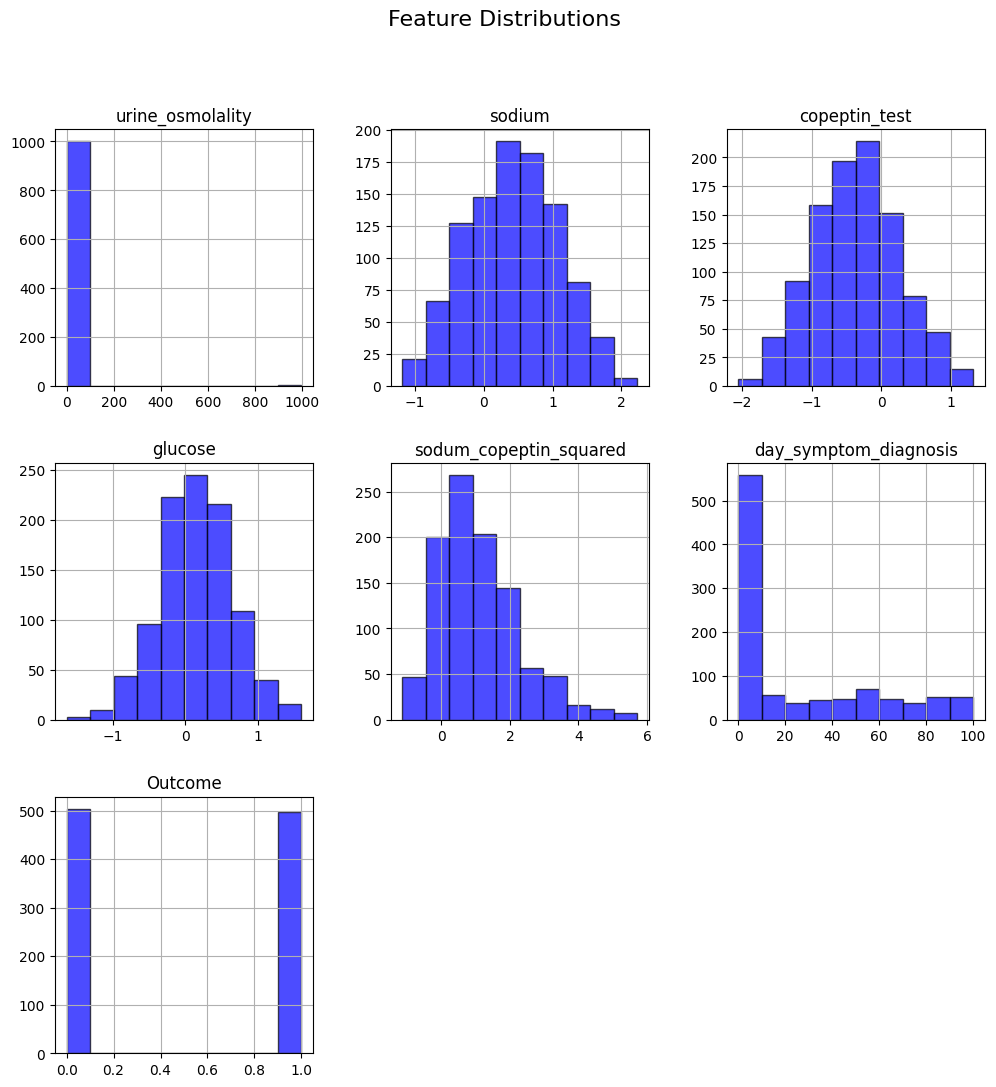

In [224]:
# Plotting feature distributions
df.hist(bins=10, figsize=(12, 12), color='blue', edgecolor='black', alpha=0.7)
plt.suptitle('Feature Distributions', size=16)
plt.show()


The graph above indicates that the day_symptom_diagnosis feature contains an excessive number of values set to 0. To address this issue, we will apply k-Nearest Neighbors (kNN) imputation to replace the 0 values and then normalize this feature to reduce its significance. Dropping this column is not deemed appropriate at this stage.

## Data Balancy

**Dealing with outliers**

Removing the outliers in the 'Urine osmolality' column

In [225]:
df = df[df['urine_osmolality'] != 999.000000]

Show rows which have value with average imputed values on 'Urine osmolality' and drop them.

In [226]:
# Display rows where Diagnosis is 1 (Diabetes Insipidus)
diabetes_insipidus_df = df[df['urine_osmolality'] == 0.345594]
print("Rows with Urine osmolality = 1:")
print(diabetes_insipidus_df)

# Drop rows where Diagnosis is 1
df_dropped = df[df['urine_osmolality'] != 0.345594]
print("\nDataFrame after dropping rows with Diagnosis = 1:")
print(df_dropped)
df = df_dropped

Rows with Urine osmolality = 1:
Empty DataFrame
Columns: [urine_osmolality, sodium, copeptin_test, glucose, sodum_copeptin_squared, day_symptom_diagnosis, Outcome]
Index: []

DataFrame after dropping rows with Diagnosis = 1:
     urine_osmolality    sodium  copeptin_test   glucose  \
0            0.088850 -0.558571      -0.044022 -0.205063   
1            0.345594  0.343953      -0.530874  0.442238   
2            0.790099  1.038287      -0.790693  0.817564   
3            0.905293  1.254929      -0.947177  0.522782   
4            0.279895 -0.324696      -0.625348  0.929489   
..                ...       ...            ...       ...   
995         -0.660011 -0.289523      -0.053997 -0.150436   
996          0.294115 -0.278125      -1.001482  0.755916   
997         -0.018518 -0.589220       0.158954 -0.334438   
998          0.385349  0.959013      -0.375285  0.517539   
999         -0.346210 -0.489407       0.290889 -0.152735   

     sodum_copeptin_squared  day_symptom_diagnosis  Ou

In [227]:
df_dropped.shape

(1000, 7)

## KNN Imputation on day_symptom_diagnosis

In [228]:
# we are just storing the original model for later diagnosis of the impact of knn-imputation

df_before_knn_imputation = df.copy()

In [229]:
from sklearn.neighbors import KNeighborsClassifier
# Replace non-0/1 values with NaN for the InsulinResistance column
df['day_symptom_diagnosis'] = df['day_symptom_diagnosis'].apply(lambda x: x if x in [0] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = df[df['day_symptom_diagnosis'].isna()]
df_complete = df.dropna(subset=['day_symptom_diagnosis'])

features = df_complete.drop(columns='day_symptom_diagnosis')
target = df_complete['day_symptom_diagnosis']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(features, target)

# Predict the missing values
df_missing['day_symptom_diagnosis'] = knn.predict(df_missing.drop(columns='day_symptom_diagnosis'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()
df = df_combined


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Box plot

Box plot help us to explore outliers in the data. It help us to identify potentially bad data.
Based on the corrections from above it seems that less outliers are around and high impacting features have been normalized

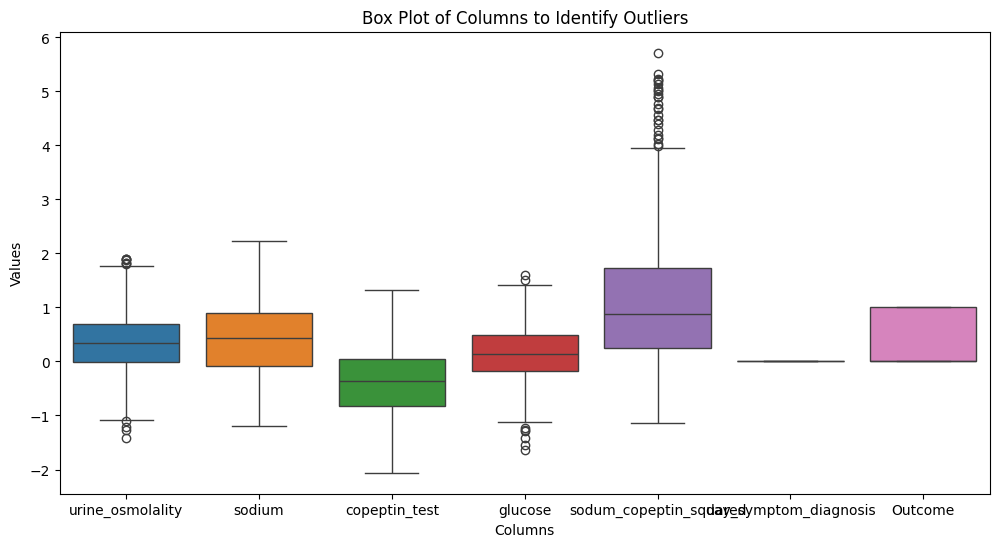

In [230]:
# Identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

Shows values of each column and plots it (find differences, often used values, ...), has been comented out for readability purposes.

In [231]:

#column_names = df.columns.tolist()
#for column_name in column_names:
#    value_counts = df[column_name].value_counts()
#    print("Value Counts for column '{}':".format(column_name))
#    print(value_counts)
#    print()
# 
#    # Plotting the value counts
#    plt.figure(figsize=(10, 6))
#    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
#   
#    # Adding titles and labels
#    plt.title("Value Counts for column '{}'".format(column_name))
#    plt.xlabel(column_name)
#    plt.ylabel('Counts')
#    plt.show()

**Dealing with negative numerical values**

In [232]:
# Suppress settingwithcopywarning

#pd.set_option('mode.chained_assignment', None)
#df[''].replace(-60, 60, inplace=True)

# Parameter Importance Analysis

- Perform an analysis to determine the importance of different biomarkers.
- Identify which biomarkers are the most critical for accurate diagnosis and discuss why they are significant.

### Summary

Before perfoming the data cleaning we have seen a couple of problems, described in the table below.

| Feature                        | Impact on Model Output                                                                                                          |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------------------|
| **day_symptom_diagnosis**      | Substantial negative impact when values are high, significantly lowering the predicted probability of Diabetes Insipidus.       |
| **Sodium**                     | Higher values tend to increase the model's output, indicating a higher predicted probability of Diabetes Insipidus.              |
| **Copeptin test**              | Both positive and negative impacts; higher levels generally decrease the predicted probability.                                  |
| **sodium_copeptin_squared**    | Shows a spread-out distribution of impact, indicating it captures some non-linear relationships in the data.                     |
| **Urine osmolality**           | Higher values decrease the predicted probability of Diabetes Insipidus.                                                          |
| **Glucose**                    | Varied impact with no clear trend, suggesting it might not be as significant for the prediction.                                 |

## Potential bias

- The day_symptom_diagnosis feature has a strong negative impact on the model's prediction. If the feature has extreme values that dominate the model's decision-making process, this could indicate a bias.
- Features with extreme SHAP values (positive or negative) consistently across their range might skew the model's prediction towards a certain outcome, which could be problematic if it doesn’t align with clinical understanding.

## Outcome
After data cleaning we have a better balanced and dataset for our model creation which are shown in the below metrics.

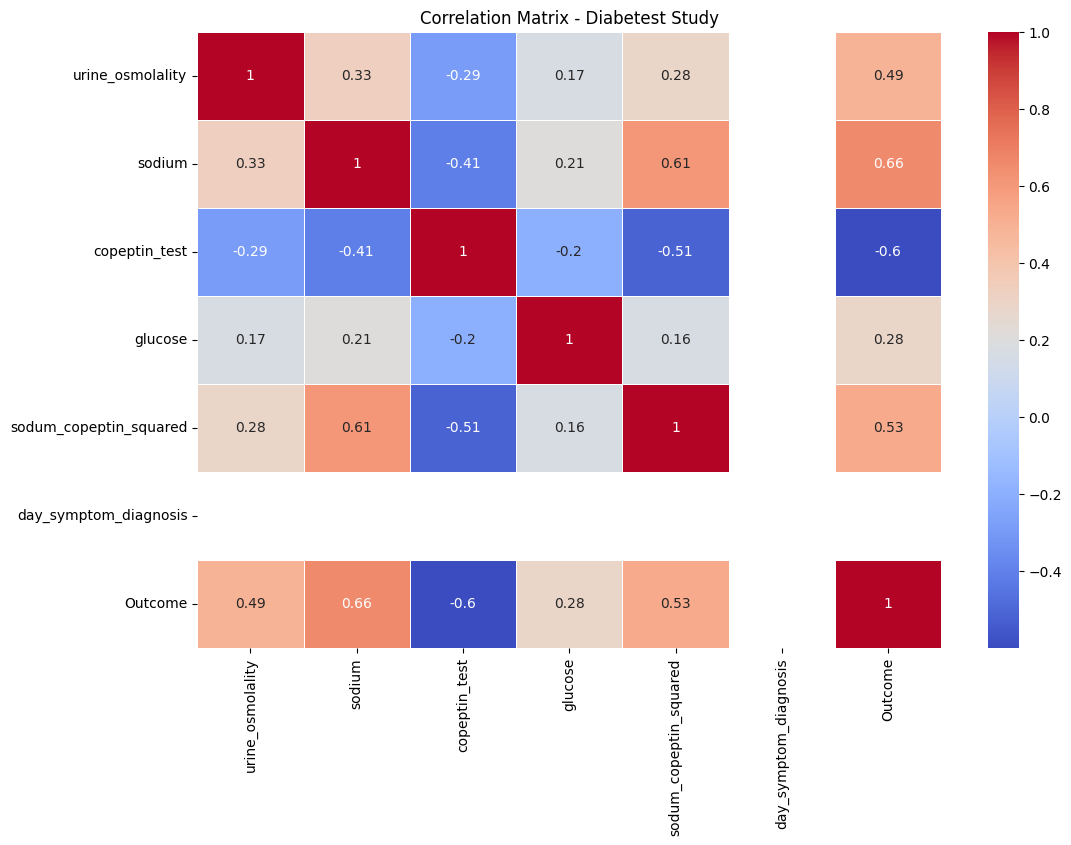

In [233]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

In [234]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df.Outcome
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

# (limit to depth 2 for better readability of the model) -> ok it's a bit radical, but we want to really see
# what is most important...
dtree = DecisionTreeClassifier(max_depth=2)

# train Decision Tree classifer
dtree = dtree.fit(training_features,training_target)

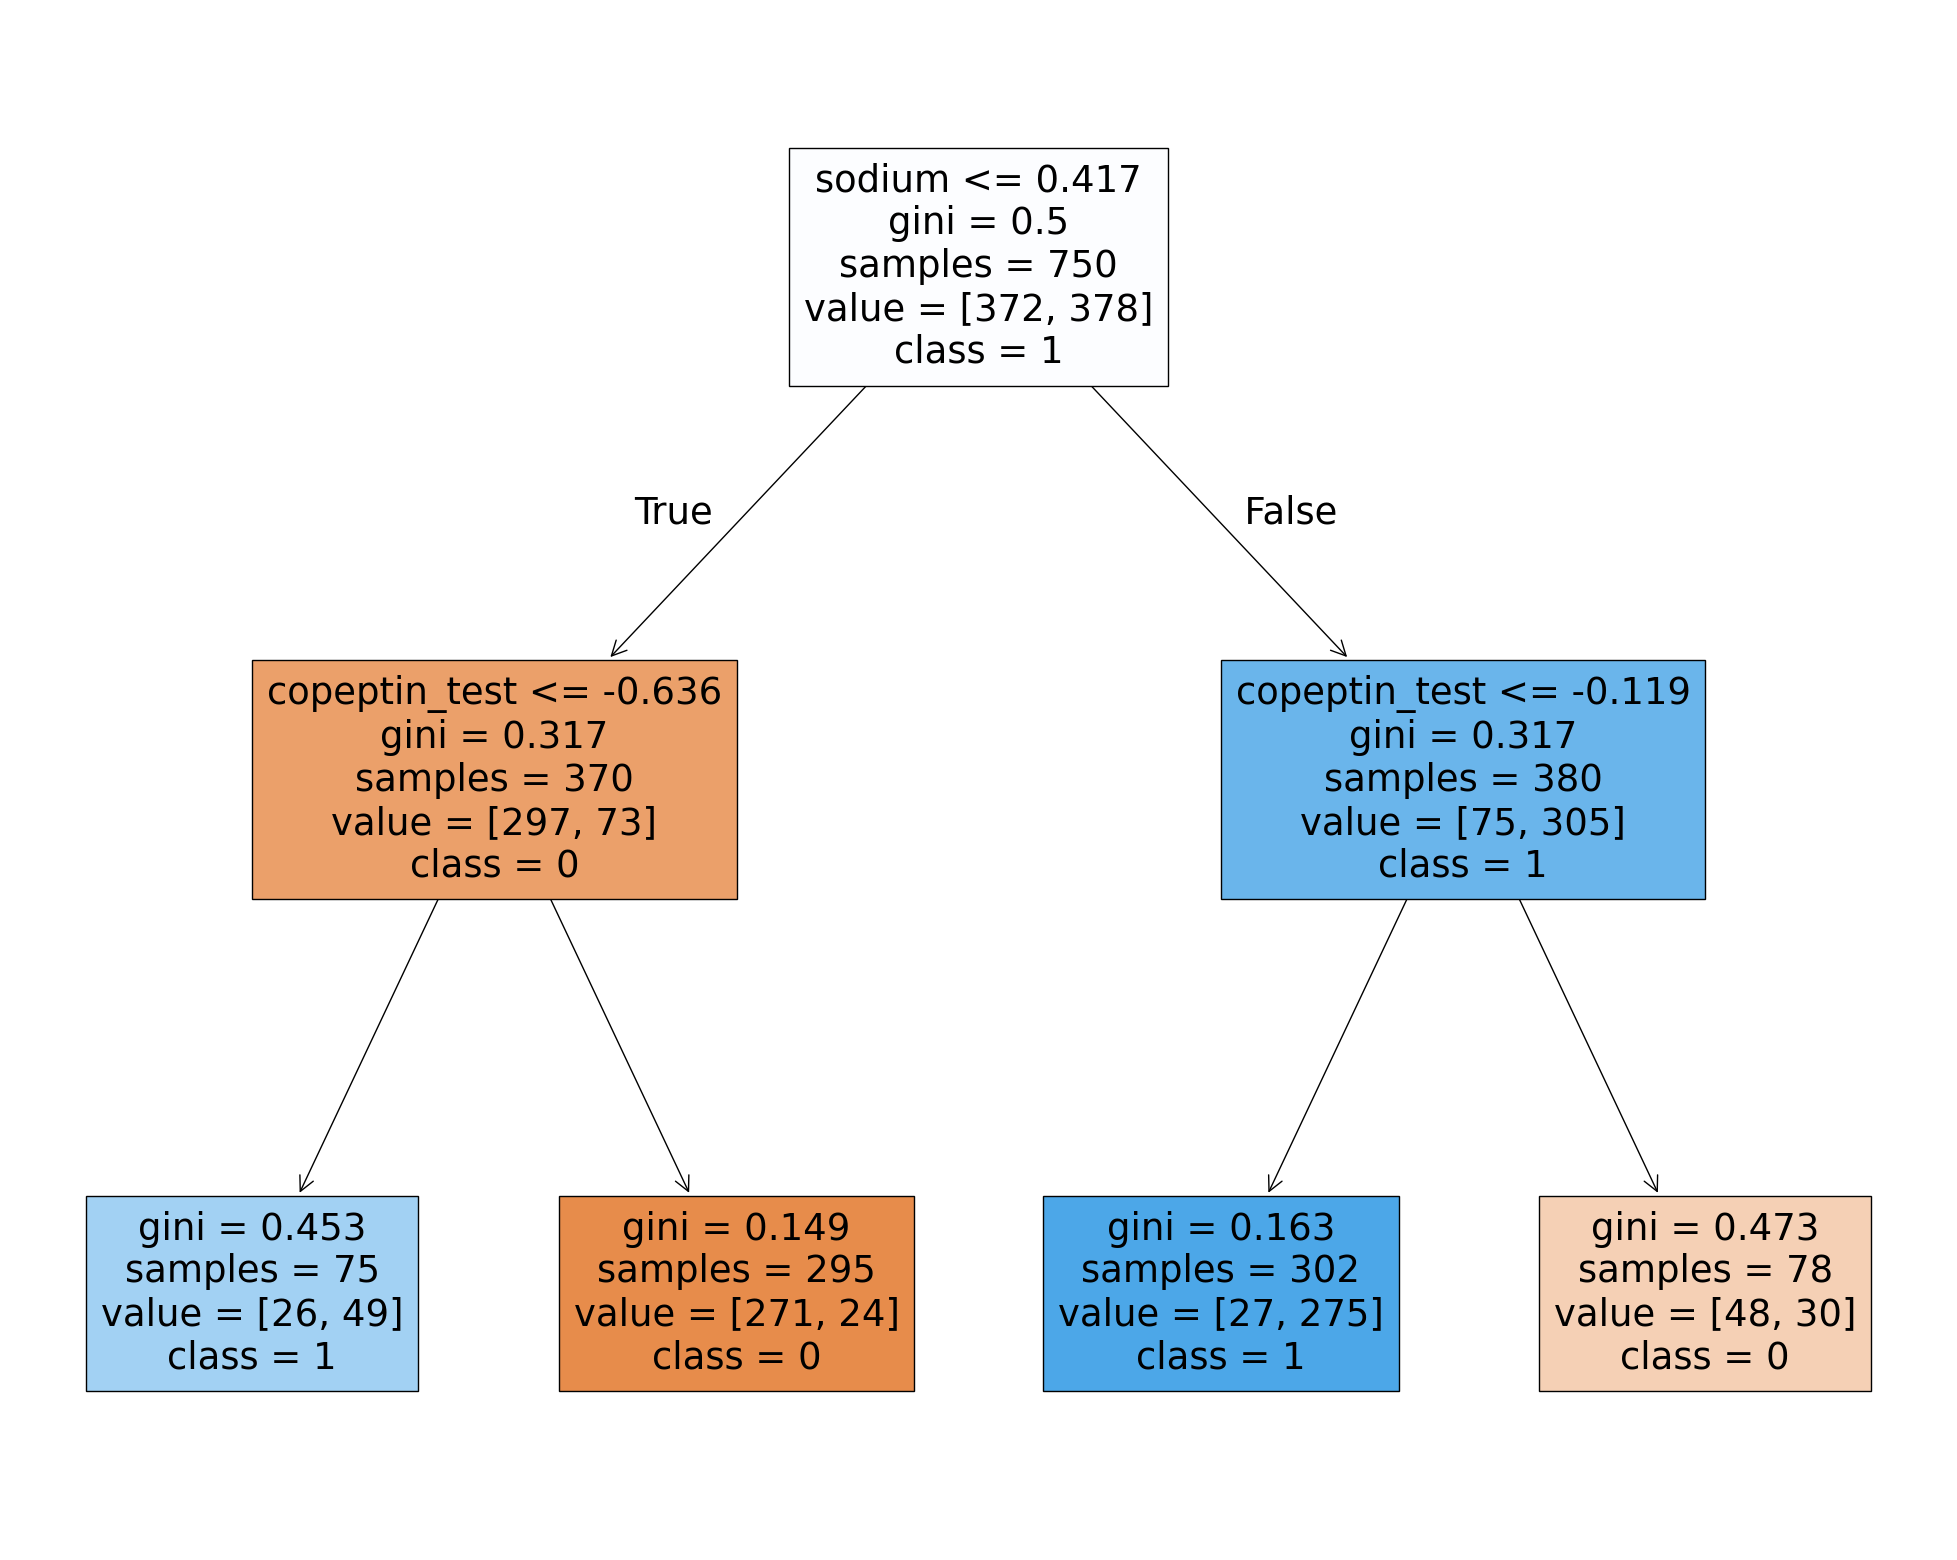

In [235]:
from sklearn import tree

# plot the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=df.columns.values.tolist(), class_names=['0','1'], filled=True)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



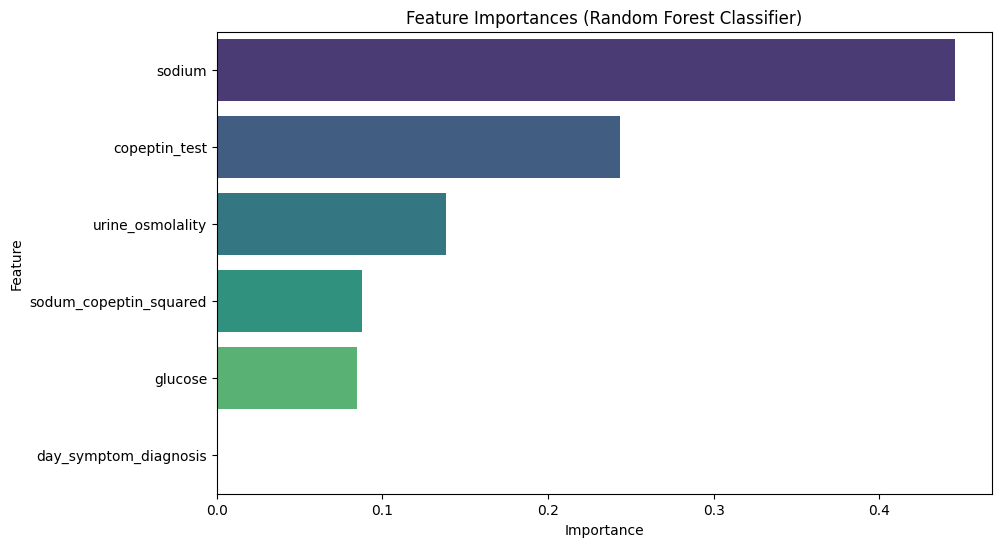

[10:40:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


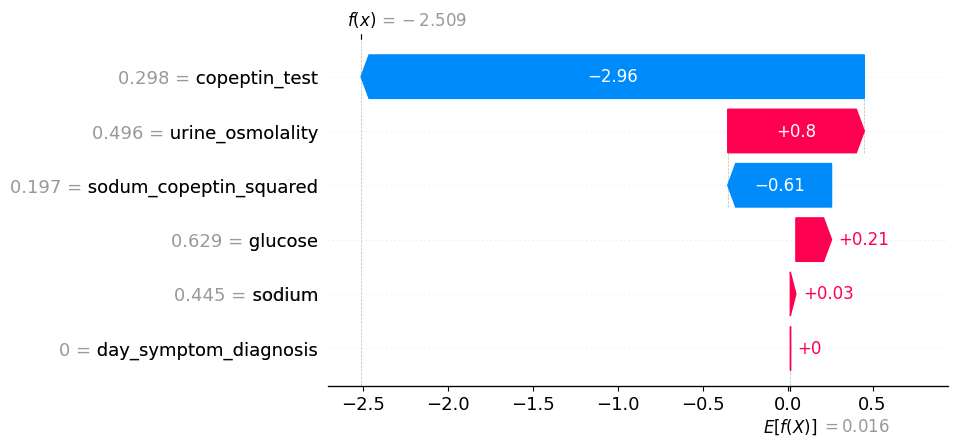

In [236]:
import xgboost as xgb
import shap


model = xgb.XGBClassifier()
model.fit(training_features.values, training_target.values)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
xgb.XGBClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

In [237]:
# SHAP
import shap

explainer = shap.Explainer(model, training_features)
shap_values = explainer(testing_features)

[10:40:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


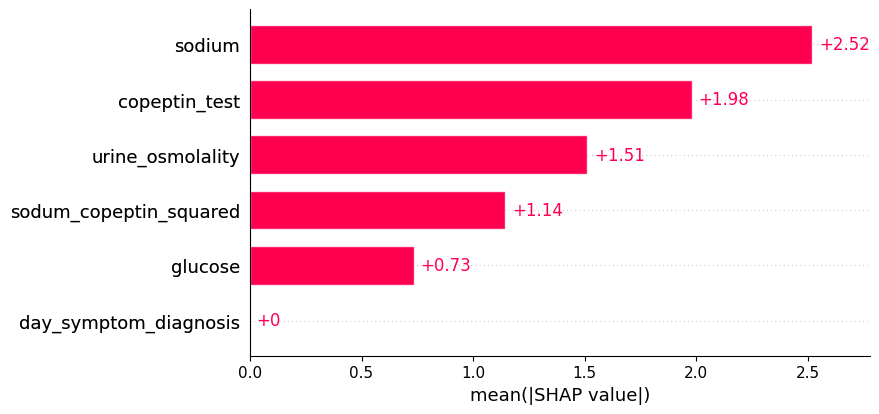

In [238]:
shap.plots.bar(shap_values)

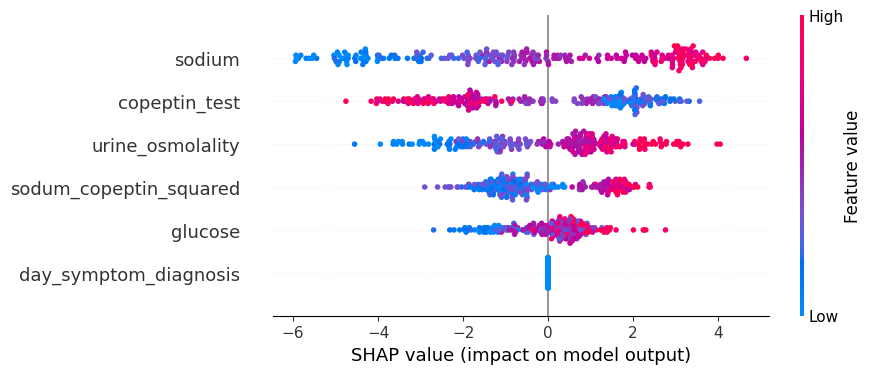

In [239]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

# Model Creation for Prognosis

- Using the corrected data and insights from the parameter importance analysis, develop a predictive model to provide a reliable diagnosis.
- Explain the choice of model and justify why it is suitable for this task.
- Validate the model using appropriate techniques such as cross-validation, and evaluate its performance using relevant metrics (e.g., accuracy, precision, recall, F1-score).

In [240]:
df.describe()

,urine_osmolality,sodium,copeptin_test,glucose,sodum_copeptin_squared,day_symptom_diagnosis,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,0.345594,0.422087,-0.360233,0.147037,1.099684,0.0,0.497000
std,0.543803,0.656795,0.622298,0.505205,1.174570,0.0,0.500241
min,-1.424271,-1.185126,-2.056621,-1.637505,-1.136456,0.0,0.000000
25%,-0.012294,-0.092965,-0.821657,-0.171951,0.241833,0.0,0.000000
50%,0.345594,0.440867,-0.360559,0.134889,0.880090,0.0,0.000000
75%,0.700579,0.899628,0.053746,0.489104,1.733743,0.0,1.000000
max,1.900842,2.232990,1.322518,1.597155,5.717749,0.0,1.000000


In [241]:

X = df.drop(columns='Outcome', axis=1)
y = df.Outcome
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


from tpot import TPOTClassifier
# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=1, population_size=20, verbosity=20, random_state=42, scoring='accuracy')
tpot.fit(training_features, training_target)
print(tpot.score(testing_features, testing_target))
tpot.export('tpot_diabetes_pipeline_classifier.py')

32 operators have been imported by TPOT.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False.
0.912                                                                       


In [242]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Average CV score on the training set was: 0.9106666666666665

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    XGBClassifier(learning_rate=0.001, max_depth=2, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)
)

# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, classification_report
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))

[[122   9]
 [ 11 108]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       131
           1       0.92      0.91      0.92       119

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Training accuracy: 0.908
Testing accuracy: 0.92


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


**Summary of model selection**

The XGBClassifier from the XGBoost library was selected as the best model by TPOT, an automated machine learning tool. Here are the key reasons why XGBClassifier is an excellent choice:

The XGBClassifier was selected by TPOT as the best model due to its high performance, robustness, and ability to handle the dataset effectively. The performance metrics indicate a well-performing model:

**Accuracy:** The model achieved an accuracy of 0.92 on the testing set, indicating it correctly predicts the class for 92% of the instances.
**Precision and Recall:** Both precision and recall are balanced at 0.92 for each class, showing the model is equally effective at identifying positive and negative cases.
**F1-Score:** The F1-scores for both classes are also 0.92, indicating a balance between precision and recall.

The confusion matrix shows that the model correctly classified the majority of instances, with only a small number of misclassifications (9 false negatives and 11 false positives).

The high training accuracy (0.908) and testing accuracy (0.92) further validate the model’s robustness and ability to generalize well to new data, making XGBClassifier an excellent choice for this classification task.

## Showcase before imputation

Just to showcase the impact of the knn-imputation the same has being trained on the initial dataset, which shows very unrealisitc outcomes of mettrics such as accuracy Confusion Matrix and so on.

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Average CV score on the training set was: 0.9106666666666665

X = df_before_knn_imputation.drop(columns='Outcome', axis=1)
y = df_before_knn_imputation.Outcome
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    XGBClassifier(learning_rate=0.001, max_depth=2, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.8, verbosity=0)
)

# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, classification_report
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))

[[130   1]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       131
           1       0.99      1.00      1.00       119

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Training accuracy: 0.9986666666666667
Testing accuracy: 0.996


X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
